# Data Science Regression Project: Predicting Home Prices in Banglore

We are using SUPERVISED learning for which labelled data is needed 
i.e you are trying to build model using using input and output values available 

Price is in INR (120 = 1,20,00,000 , 39.07 = 39 Lakhs)


In [40]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Setting the figure size in Matplotlib, scales the size of the figure that is rendered when you plot something using Matplotlib. 
# This particular line of code you provided sets the figure size to be 20 units wide and 10 units tall.

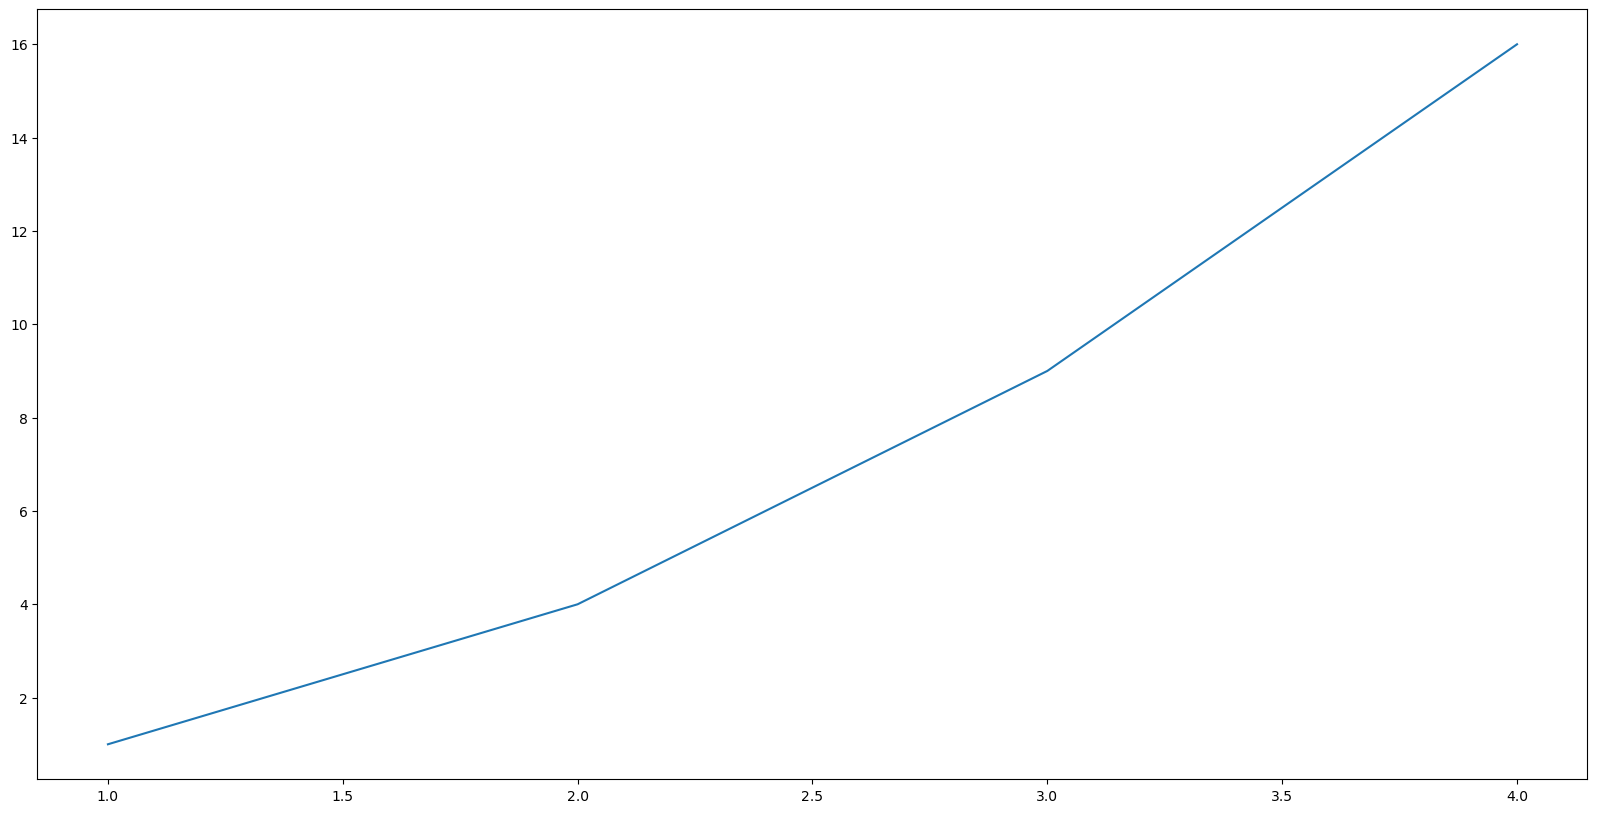

In [41]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

In [42]:
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\SK\\Personal\\Career\\PROJECTS\\ML\\House Price\\bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [43]:
df.shape

(13320, 9)

In [44]:
df.groupby('area_type')['area_type'].agg('count')


# Grouping by 'area_type': 
# The groupby() function in pandas is used to split the DataFrame into groups based on some criteria. 
# In this case, the criteria is the unique values in the 'area_type' column. 
# So, df.groupby('area_type') groups the DataFrame df by the values in the 'area_type' column. 
# This means that all rows with the same value in the 'area_type' column are grouped together.

# Selecting 'area_type' column: 
# After grouping, you want to perform some operation on the grouped data. 
# Here, you're interested in counting the occurrences of each unique value in the 'area_type' column. 
# So, ['area_type'] selects the 'area_type' column for this operation.

# Aggregating with count: 
# Now that you have selected the 'area_type' column, you want to aggregate the data within each group. 
# The aggregation function used here is agg('count'). 
# This function counts the number of occurrences of each unique value within each group.


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [45]:
df1 = df.drop(['area_type','society','balcony','availability'],axis=1)

# This line of code creates a new DataFrame df1 by removing the columns 'area_type', 'society', 'balcony', and 'availability' from the original DataFrame df.

In [46]:
df1.shape

(13320, 5)

In [47]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# Start with Data Cleaning process

Data Cleaning process starts with handling NA values

In [48]:
df1.isnull().sum()

# df1.isnull(): 
# This method returns a DataFrame of the same shape as df1, where each element is True if the corresponding element in df1 is NaN, and False otherwise.

# sum(): 
# When called on a DataFrame, this method sums the values along the specified axis (default is 0, which means summing vertically, i.e., column-wise).

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

There are 73 rows where value of bath is NA(Not Available)
2 options are available :
1. Drop the NA rows
2. Take median of all the available values and insert in the missing places

HOW TO DECIDE WHICH ONE TO USE ?

Compare the total number of rows and the number of NA rows
total number of rows : 13320 rows  
number of NA rows :
location       1
size          16
total_sqft     0
bath          73

It's very small 
Hence can be dropped!!!

In [49]:
df2 = df1.dropna()
    
# This will drop the rows with NA values

In [50]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Checking the size column



In [51]:
df2['size'].unique()

# df2['size']: 
# This selects the 'size' column from the DataFrame df2.

# .unique(): 
# This method returns an array of unique elements in the selected column.

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Feature Engineering

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

# Observe the data

4 bedroom and 4 BHK are same


In [52]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

# create a new column "bhk" in df2 dataframe based on size column

# df2['size'].apply(...)
# This accesses the 'size' column of the DataFrame df2 and applies a function to each element of that column.
 
# The function is 
# A lambda function, an anonymous function used for short operations. 
# Here, it takes a single argument x. 
# It splits x using a space (' ') as the separator (split(' ')) and takes the first part ([0]). 
# Then, it converts that part into an integer using int().
# So, if x is a string like "3 BHK", this lambda function will extract "3" as a string and convert it into an integer.

#  this line of code extracts 
# the number from the 'size' column 
# and assigns it to a new column named 'bhk' in the DataFrame df2.

C:\Users\hp\AppData\Local\Temp\ipykernel_15528\1607737424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [53]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [54]:
df2['bhk'].unique()

# used to find the unique values in the 'bhk' column of the DataFrame df2

# When you call df2['bhk'].unique(), 
# it will return an array or list 
# containing all the unique values found in the 'bhk' column. 
# This is useful for understanding the range of bedroom sizes present in the dataset.

# For example, if the dataset includes properties with 1, 2, 3, and 4 bedrooms, 
# calling df2['bhk'].unique() will return something like [1, 2, 3, 4].

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [55]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


A house with 2400 sq ft area cannot have 43 bedrooms.

It must be an error


In [56]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

1133 - 1384 this is a range of values 

HOW TO TACKLE THIS?

 1. Take avg of both the numbers  

In [57]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

# try: : 
# This starts a try-except block, which is used for error handling in Python.

# float(x): 
# Inside the try block, it attempts to convert the input x into a float using the float() function. 
# If x is a valid floating-point number (e.g., '3.14', '10.5'), this conversion will succeed without raising an error.

# except: : 
# If there is an error during the execution of the code within the try block, 
# the program will jump to the except block to handle the error.

# return False: 
# If an error occurs during the conversion attempt 
# (for example, if x is not a valid string representation of a float), 
# the function returns False.

# return True: 
# If the conversion is successful and no error occurs, the function returns True

In [58]:
df2[df2['total_sqft'].apply(is_float)]

# df2['total_sqft'].apply(is_float): 
# This applies the is_float function to each element in the 'total_sqft' column of the DataFrame df2. 
# The is_float function returns True if the value can be converted into a float, and False otherwise. 
# So, this expression creates a boolean mask indicating which rows have 'total_sqft' values that are valid floats.

# df2[boolean_mask]: 
# This filters the DataFrame df2 using the boolean mask obtained from the previous step. 
# It selects only the rows where the corresponding value in the boolean mask is True, 
# effectively including only those rows where the 'total_sqft' values are valid floats.

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [59]:
df2[~df2['total_sqft'].apply(is_float)]

# The ~ operator negates the boolean mask obtained from the previous step. 
# This means it will select rows where the corresponding value in the boolean mask is False
# effectively including only those rows where the 'total_sqft' values are not valid floats.



,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [60]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


This data is unstructured 

total_sqft contains multiple units

 HOW TO TACKLE THIS?
 
 1. 1133 - 1384 this is a range of values
     1) Take avg of both the numbers
     

 2. 4125Perch, 34.46Sq. Meter are the values in different units 
     1) Perform unit conversion
                 or
     2) Ignore these values 



In [61]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  
    
# tokens = x.split('-'): 
# This line splits the input x by the '-' character, 
# creating a list of strings called tokens. 
# This is to handle cases where the 'total_sqft' represents a range (e.g., '1000-1500').

# if len(tokens) == 2:: 
# This condition checks if the length of tokens is 2, 
# indicating that x represents a range of values.

# return (float(tokens[0])+float(tokens[1]))/2: 
# If x is a range, this line calculates the average of the two values in the range and returns it as a float. 

# For example, if x is '1000-1500', it returns the average of 1000 and 1500, which is 1250.

# try:: 
# This starts a try-except block to handle potential errors during the conversion process.

# return float(x): 
# This attempts to convert the input x into a float.
# If x represents a single numerical value (e.g., '1000'), this conversion will succeed, and the function will return the float representation of x.

# except:: 
# If there is an error during the conversion attempt (e.g., if x contains non-numeric characters), 
# the program will jump to the except block to handle the error.

# return None: 
# If an error occurs during the conversion attempt, the function returns None, 
# indicating that the conversion was not successful.

In [62]:
convert_sqft_to_num('2600')

2600.0

In [63]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [64]:
(2100+2850)/2

2475.0

In [65]:
convert_sqft_to_num('34.46Sq. Meter')

Above line returns nothing (NONE)

df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

In [66]:
df3.loc[30]

# This will return the row with index label 30 from DataFrame df3

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# Feature Engineering
Add new feature called price per square feet

In [67]:
df4 = df3.copy()

In [68]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

# df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']: 
# This line of code calculates 

# the price per square foot by 
# dividing the price of each property (presumably in rupees) by 
# its total square footage. 

# It multiplies the price by 100,000 to
# convert it to rupees (assuming the price is given in lakhs) 
# before dividing by the total square footage. 

# This calculation results in the price per square foot.

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [69]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [70]:
len(df4.location.unique())

# df4.location.unique(): 
# This extracts all unique values from the 'location' column of DataFrame df4. 
# The .unique() function returns an array or list containing these unique values.

# len(...): 
# This calculates the length of the array returned by df4.location.unique(), 
# giving the count of unique locations.

1304

This is called DIMENSIONALITY CURSE

This is a high dimensionality problem 

In such cases many locations will have very few(1 or 2) data points 

Such multiple locations can be treated as one group of others 

In [71]:
df4_stats = df4['price_per_sqft'].describe()
df4_stats


# df4['price_per_sqft'].describe(): 

# This selects the 'price_per_sqft' column from DataFrame df4 and 
# then applies the .describe() method to it. 

# The .describe() method generates various summary statistics of the selected column, including 
# count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum value.

# df4_stats: 
# This stores the output of the .describe() method in a variable named df4_stats.

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [72]:
df4.to_csv("bhp.csv",index=False)

# df4.to_csv("bhp.csv", index=False): 
# This line calls the to_csv() method on DataFrame df4. 
# The method is used to save the DataFrame to a CSV file. 

# The first argument specifies the file path and name where the DataFrame will be saved ("bhp.csv" in this case). 

# The index=False argument specifies that the index column should not be included in the CSV file. 
# If index were set to True, the DataFrame's index would be written as the first column in the CSV file.

# Examine locations 

It is a categorical variable. 

We need to apply dimensionality reduction technique here to reduce number of locations

In [73]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

# df5.location.apply(lambda x: x.strip()): 
# This applies a lambda function to each element in the 'location' column of DataFrame df4. 

# The lambda function, lambda x: x.strip(), 
# is used to remove any leading or trailing whitespace characters from each location string. 
# This helps in standardizing the format of location names.

# location_stats = df4['location'].value_counts(ascending=False): 
# After applying the strip() function to the 'location' column, 

# this line calculates 
# the frequency of each unique location in the DataFrame df4. 

# The value_counts() function counts the occurrences of each unique value in the 'location' column and 
# returns a Series where the index contains unique location names, 
# and the values represent their respective frequencies. 

# Setting ascending=False sorts the result in descending order based on frequency.

# location_stats: 
# This variable holds the resulting Series containing the frequency of each unique location in DataFrame df5.

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [76]:
location_stats.values.sum()

# location_stats.values: 
# This retrieves the values from the location_stats Series, 
# which represent the frequencies of each unique location.

# .sum(): 
# This method calculates the sum of all the values in the Series.

# 535 + 392 + ... + 1 + 1 = 13246 

13246

In [80]:
len(location_stats[location_stats<=10])

1052

In [82]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [78]:
len(location_stats[location_stats>10])

# location_stats[location_stats > 10]: 

# This filters the location_stats Series to include only those entries where 
# the frequency of occurrence (value) is greater than 10. 

# This results in a subset of location_stats containing only the locations with 
# more than 10 occurrences.

# len(...): 
# This function calculates the length of the filtered subset obtained in the previous step, 
# which represents the count of locations with more than 10 occurrences.

241

In [79]:
len(location_stats)

1293

In [83]:
len(df4.location.unique())

1293

In [81]:
len(location_stats[location_stats<=10])

1052

# Dimensionality Reduction


Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [84]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

# location_stats_less_than_10 = location_stats[location_stats <= 10]: 

# This filters the location_stats Series to include only those entries where 
# the frequency of occurrence is less than or equal to 10, 
# creating a subset called location_stats_less_than_10.

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [86]:
len(df4.location.unique())

1293

Converting locations with less than or equal to 10 data points to others

In [88]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

# df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x):

# This line applies a lambda function to each element in the 'location' column of DataFrame df4. 
# It checks if the location (x) is present in the location_stats_less_than_10 subset.
# If it is, it replaces the location with 'other'; 
# otherwise, it leaves the location unchanged.

# len(df4.location.unique()): 
    
# This calculates the number of unique locations in the 'location' column of DataFrame df4 after the transformation. 
# This count will include 'other' as one of the unique values if any locations were reassigned to 'other' based on their frequency of occurrence.

242

242 is the number of locations after converting locations with less than or equal to 10 data points to others

In [89]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal Using Business Logic


As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that 


normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. 

If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 


We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [93]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [94]:
1020/6

170.0

In [95]:
500/3

166.66666666666666


Check above data points.

We have 6 bhk apartment with 1020 sqft. 

Another one is 8 bhk and total sqft is 600. 

These are clear data errors that can be removed safely

In [96]:
df4.shape

(13246, 7)

In [99]:
df6 = df4[~(df4.total_sqft/df4.bhk<300)]
df6.shape

# df4.total_sqft / df4.bhk: 
# This calculates the ratio of 
# total square footage to the number of bedrooms for each row in DataFrame df4. 
# It divides the 'total_sqft' column by the 'bhk' column element-wise.

# df4[~(df4.total_sqft / df4.bhk < 300)]:    
# This filters DataFrame df4 to exclude rows where the calculated ratio
# is less than 300. 
# The ~ operator negates the boolean condition, so it selects rows where the ratio is greater than or equal to 300.

# df6.shape: 
# This retrieves the shape of DataFrame df6, which represents the number of rows and columns in the filtered DataFrame. 
# It returns a tuple where the first element is the number of rows and the second element is the number of columns.

(12502, 7)

# Outlier Removal Using Standard Deviation and Mean

In [100]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64


Here we find that min price per sqft is 267 rs/sqft 

whereas max is 12000000, 

this shows a wide variation in property prices. 

We should remove outliers per location using mean and one standard deviation

In [102]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape


# df_out = pd.DataFrame(): 
# This initializes an empty DataFrame df_out where 
# the filtered data without outliers will be stored.

# for key, subdf in df.groupby('location'):: 
# This loops through each group of the DataFrame df based on the 'location' column. 
# subdf represents each subgroup of data grouped by location.

# m = np.mean(subdf.price_per_sqft): 
# This calculates the mean price per square foot for the current subgroup subdf.

# st = np.std(subdf.price_per_sqft): 
# This calculates the standard deviation of the price per square foot for the current subgroup subdf.

# reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]: 
# This filters out the outliers by selecting rows where 
# the price per square foot falls within one standard deviation (st) from the mean (m). 
# This is done to remove data points that lie significantly far from the mean.

# df_out = pd.concat([df_out,reduced_df],ignore_index=True): 
# This concatenates the filtered subgroup reduced_df with the df_out DataFrame, 
# which accumulates the filtered data from all subgroups.

# ignore_index=True 
# is used in pandas, for data manipulation, 
# when concatenating data frames. 
# When set to True, 
# it ignores the index labels of the concatenated data frames and 
# creates a new index for the resulting data frame.

# return df_out: 
# Finally, the function returns the DataFrame df_out containing the data without outliers.

(10241, 7)

In [103]:
12502 - 10241

2261

2261 outliers have been removed 

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

For same sq ft area, whether the price of 2bhk is more than price of 3bhk

In [107]:
def plot_scatter_chart(df,location):
    
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    
    plt.title(location)
    
    plt.legend()
    
# This function essentially generates a scatter plot 
# comparing the prices of 2 BHK and 3 BHK properties 
# in a specified location. 
# It provides visual insights into the pricing trends 
# based on the property size (total square feet area) 
# for different bedroom configurations



# def plot_scatter_chart(df, location):

# This function takes two parameters: 
# df, which represents a DataFrame containing property data
# location, which specifies the location for which we want to plot the scatter chart.



# Data Filtering:

# bhk2 = df[(df.location == location) & (df.bhk == 2)]
# bhk3 = df[(df.location == location) & (df.bhk == 3)]

# This code filters the DataFrame df to get two subsets:

# bhk2: Contains properties with 2 bedrooms (bhk == 2) in the specified location.
# bhk3: Contains properties with 3 bedrooms (bhk == 3) in the same location.




# Plotting Configuration:

# matplotlib.rcParams['figure.figsize'] = (15, 10)
# This line sets the size of the figure for the scatter plot to be (15, 10) inches.

# Scatter Plot:
    
# plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
# plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)

# This code plots the scatter points:
    
# For bhk2: 
# It plots the total square feet (total_sqft) on the x-axis and 
# the price (price) on the y-axis for 2 BHK properties. 
# The points are colored blue and labeled as "2 BHK".

# For bhk3: 
# It plots the same for 3 BHK properties, 
# but with green color and labeled as "3 BHK". 
# Additionally, the marker style is set to '+'.



# Axis Labels and Title:
    
# plt.xlabel("Total Square Feet Area")
# plt.ylabel("Price (Lakh Indian Rupees)")

# These lines set labels for the x-axis and y-axis, 
# and a title for the plot. 
# The title is set to the location parameter, 
# which specifies the location being analyzed.


# plt.title(location)

# These lines set labels for the x-axis and y-axis, 
# and a title for the plot. 
# The title is set to the location parameter, 
# which specifies the location being analyzed.



# Legend:
# plt.legend()
# This line adds a legend to the plot, 
# which helps in identifying which color corresponds to which type of property (2 BHK or 3 BHK).

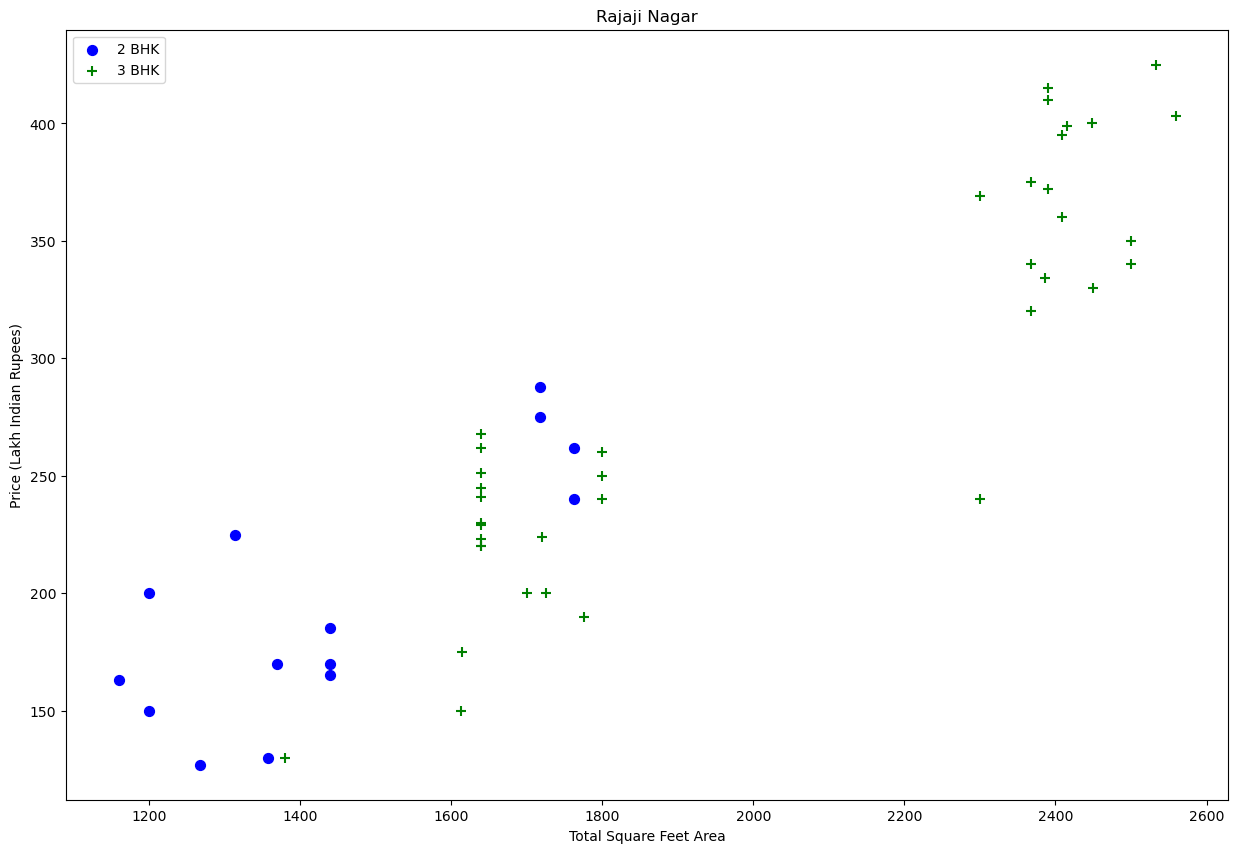

In [108]:
plot_scatter_chart(df7,"Rajaji Nagar")

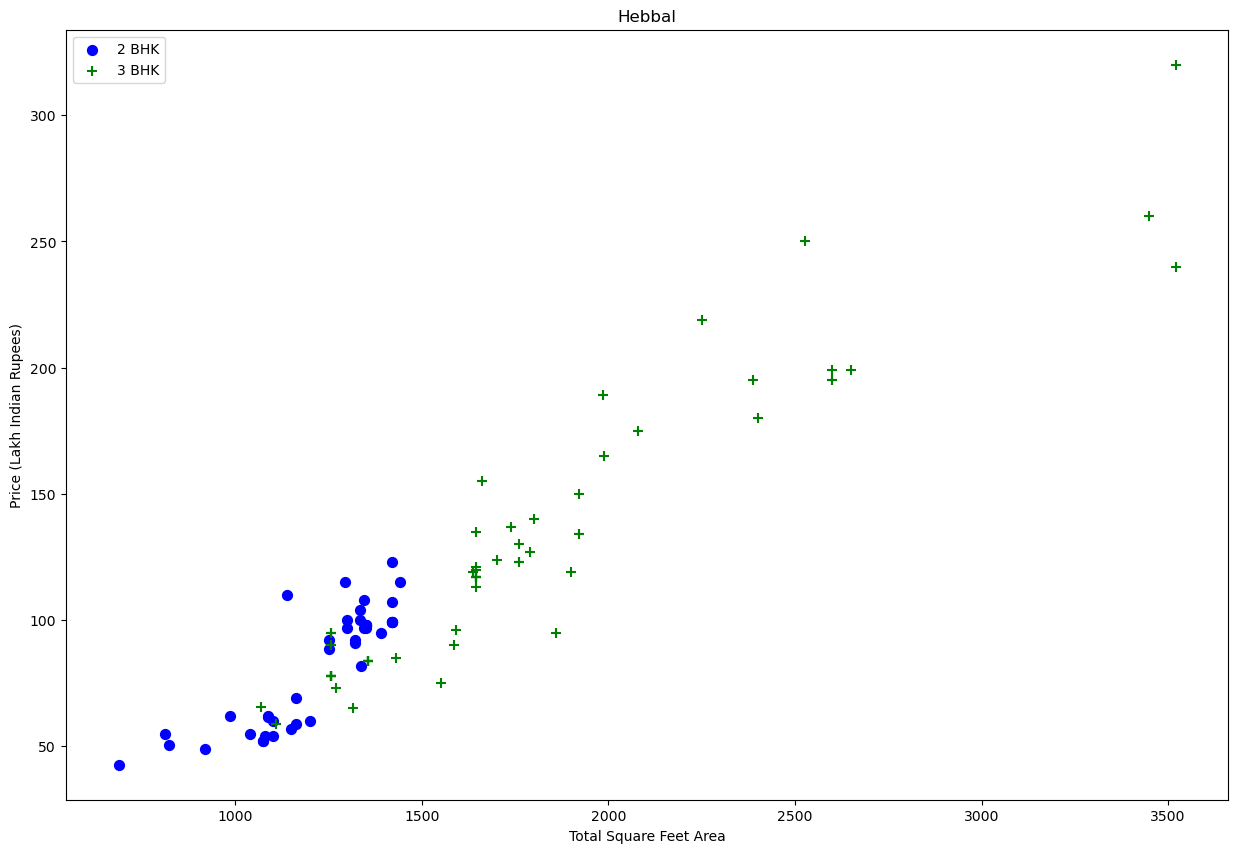

In [109]:
plot_scatter_chart(df7,"Hebbal")

We should also remove properties where for same location, 

the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). 

What we will do is for a given location, 

we will build a dictionary of stats per bhk, i.e.

{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },
    
}

Now we can remove those 2 BHK apartments whose 

price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [110]:
def remove_bhk_outliers(df):
    
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices,axis='index')



# Initialization:
# exclude_indices = np.array([])

# This line initializes an empty NumPy array exclude_indices, 
# which will be used to store the indices of rows that are identified as outliers and 
# should be removed from the DataFrame.



# Grouping by Location:
# for location, location_df in df.groupby('location'):
    
# This loop iterates over each unique location in the DataFrame df, 
# grouping the data by location.


Calculating Statistics for Each Bedroom Configuration:

bhk_stats = {}
for bhk, bhk_df in location_df.groupby('bhk'):
    bhk_stats[bhk] = {
        'mean': np.mean(bhk_df.price_per_sqft),
        'std': np.std(bhk_df.price_per_sqft),
        'count': bhk_df.shape[0]
    }
    
# For each bedroom configuration (bhk), 
# this code calculates statistics such as
# mean of price_per_sqft,
# and standard deviation of price_per_sqft, 
# and the count of properties (count) 
# in that configuration for the current location. 
# These statistics are stored in the bhk_stats dictionary.



# Identifying Outliers:
# for bhk, bhk_df in location_df.groupby('bhk'):
#     stats = bhk_stats.get(bhk-1)
#     if stats and stats['count'] > 5:
#         exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

# This loop iterates over each bedroom configuration again. 

# For each configuration, it checks if there are statistics available for 
# the previous configuration (bhk-1). 

# If such statistics exist 
# and there are more than 5 data points available, 
# it identifies outliers by comparing 
# the price_per_sqft of the current configuration 
# with the mean price per square foot of the previous configuration. 

# If the price per square foot is lower than the mean, 
# it marks those indices as outliers 
# and adds them to the exclude_indices array.



# Removing Outliers:
# return df.drop(exclude_indices, axis='index')

# Finally, the function drops the rows corresponding to the outlier indices stored in exclude_indices 
# and returns the cleaned DataFrame.

In [111]:
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)


Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

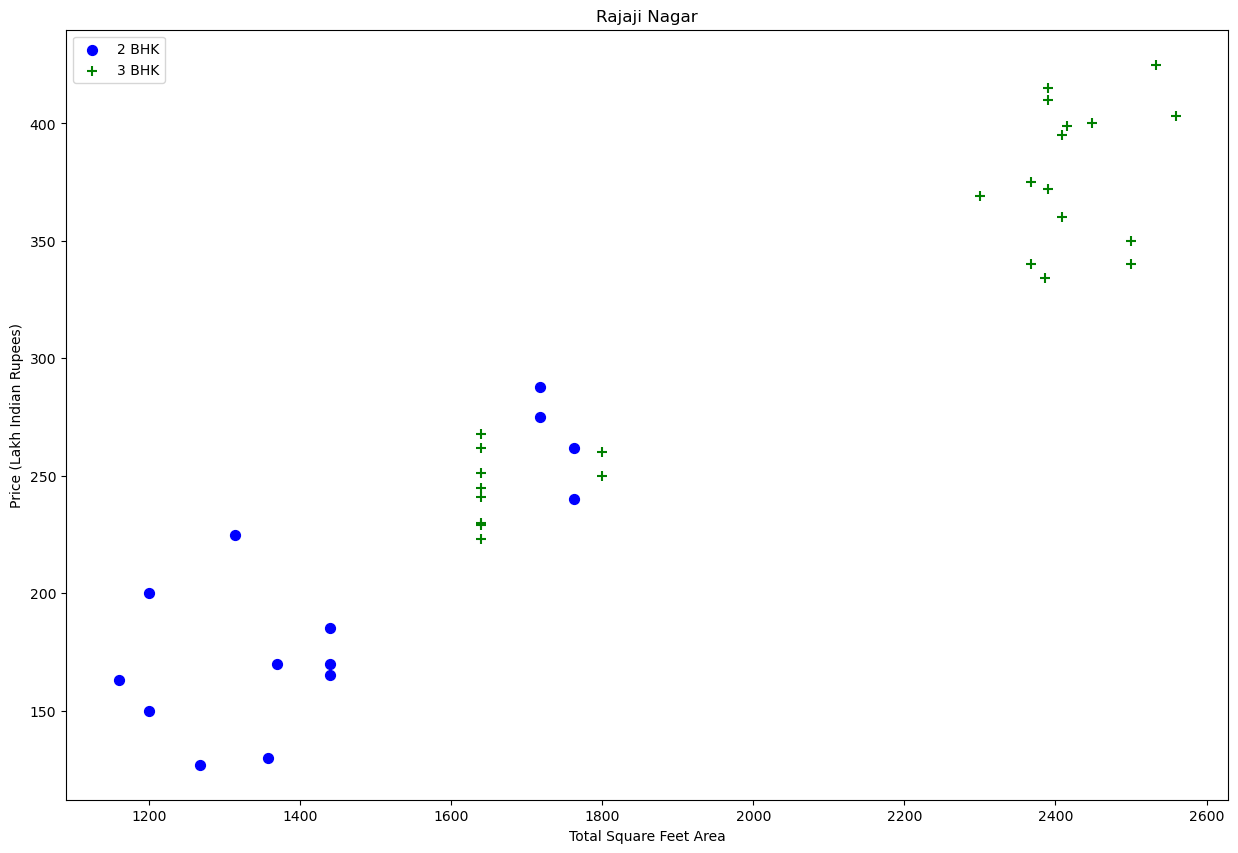

In [113]:
plot_scatter_chart(df8,"Rajaji Nagar")

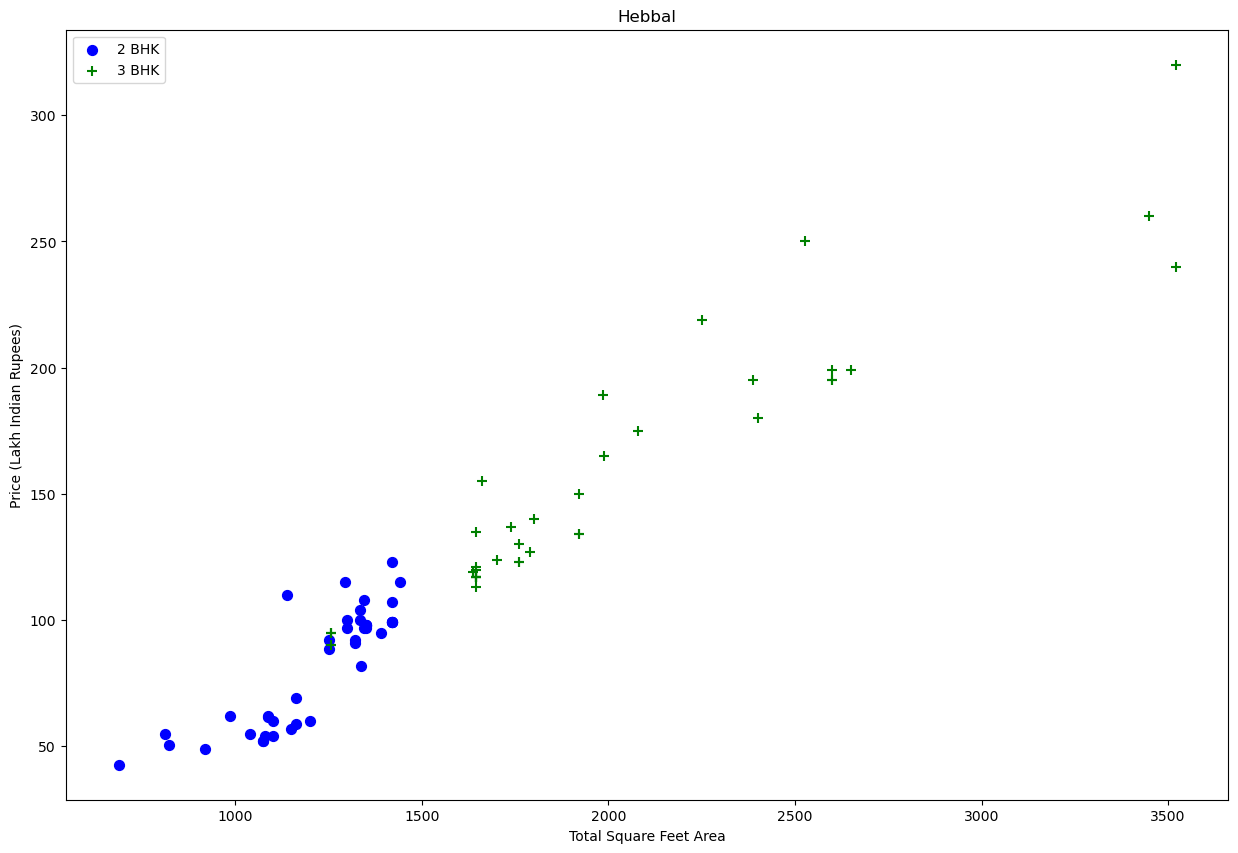

In [114]:
plot_scatter_chart(df8,"Hebbal")

Based on above charts we can see that 

data points highlighted in red below are outliers and 

they are being removed due to remove_bhk_outliers function



# Before and after outlier removal: Rajaji Nagar

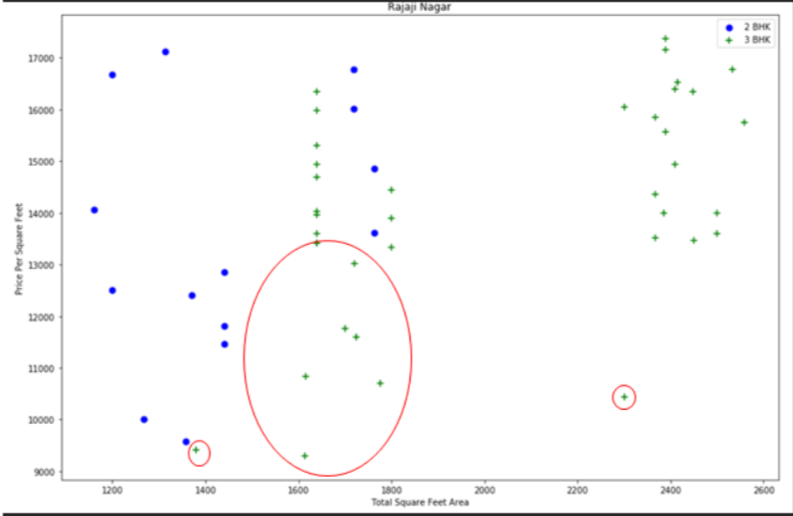             

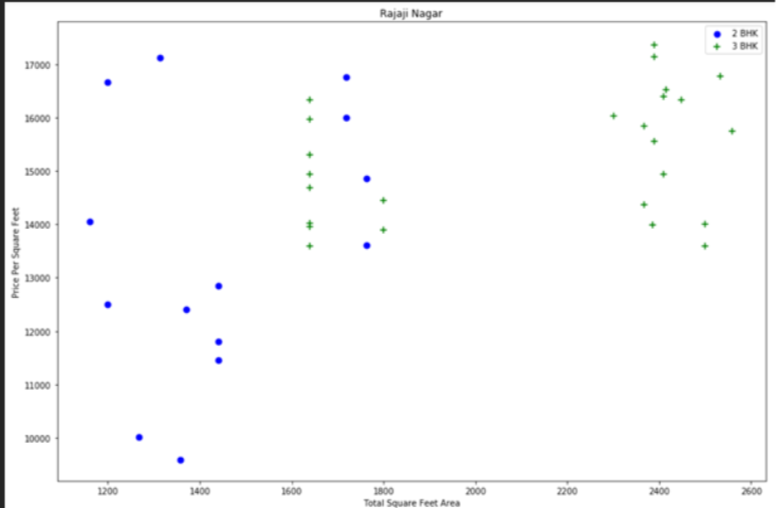

# Before and after outlier removal: Hebbal

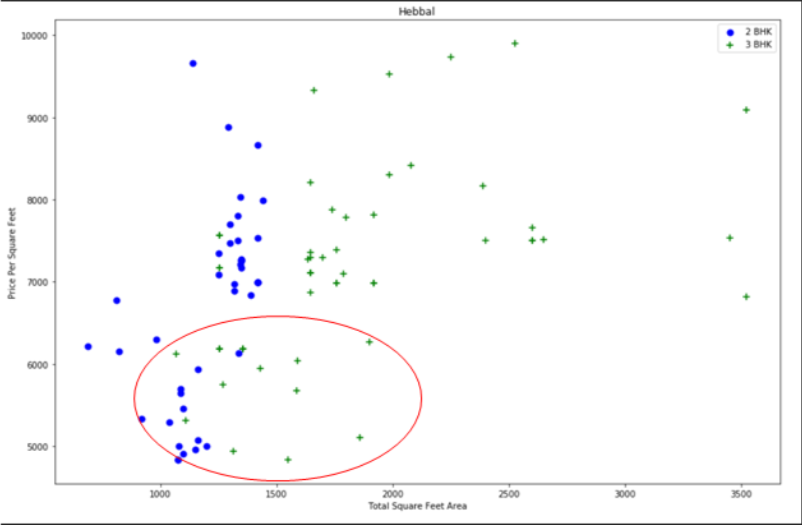

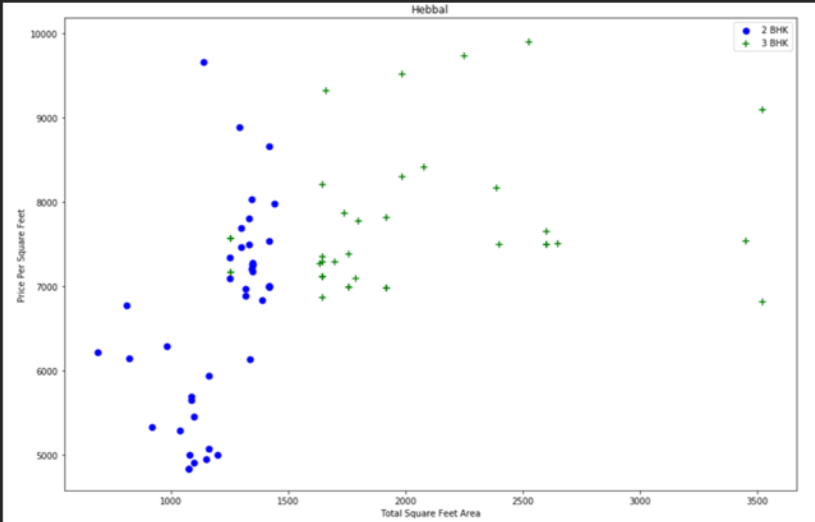

Text(0, 0.5, 'Count')

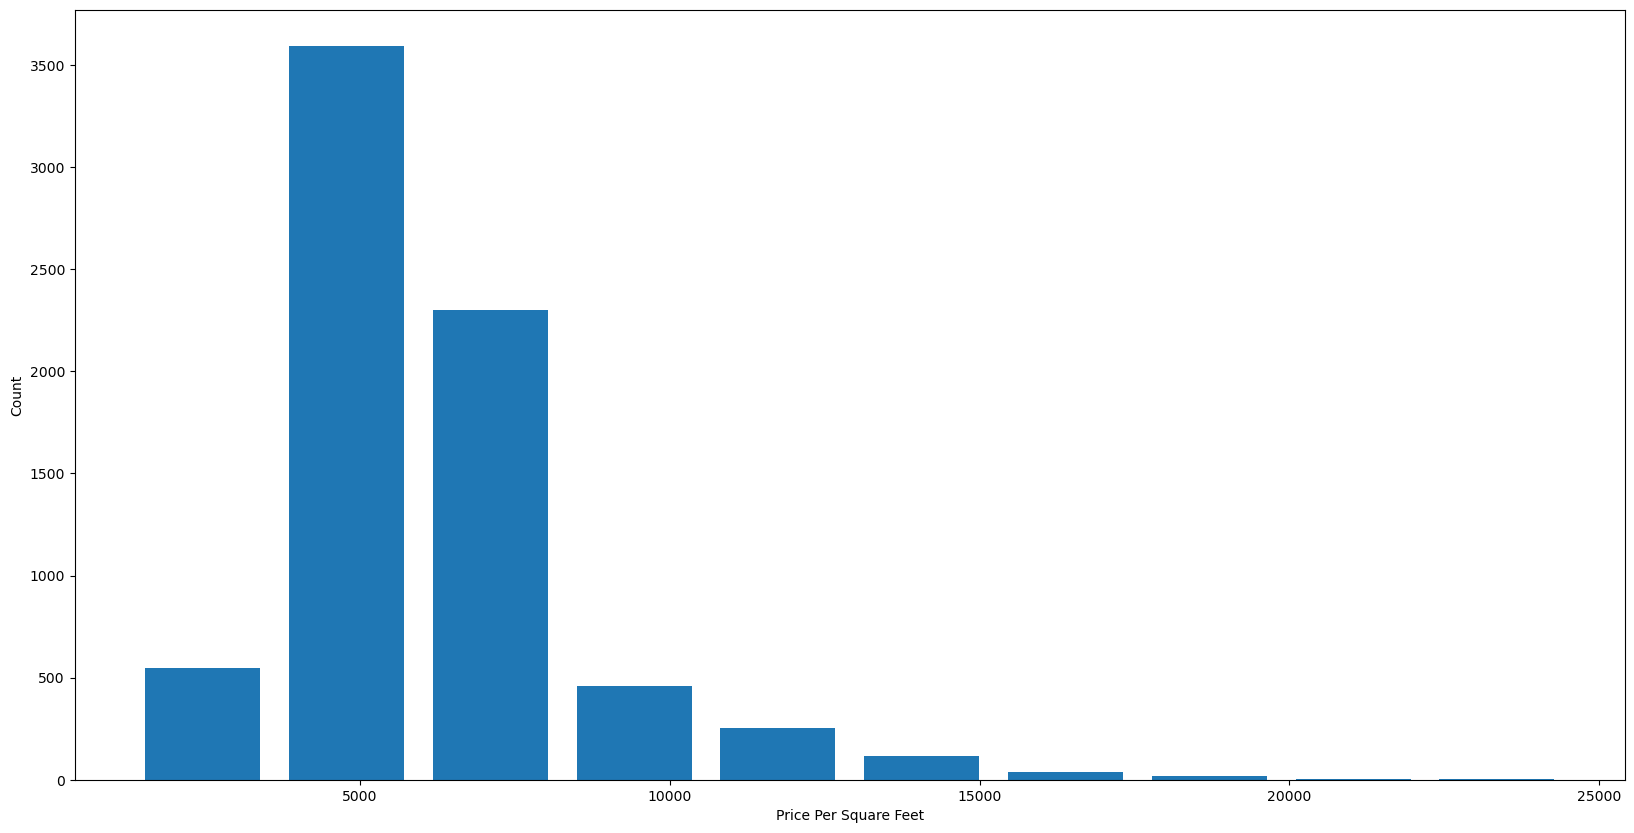

In [122]:
import matplotlib

matplotlib.rcParams["figure.figsize"] = (20,10)

plt.hist(df8.price_per_sqft,rwidth=0.8)

plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Outlier Removal Using Bathrooms Feature

In [123]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

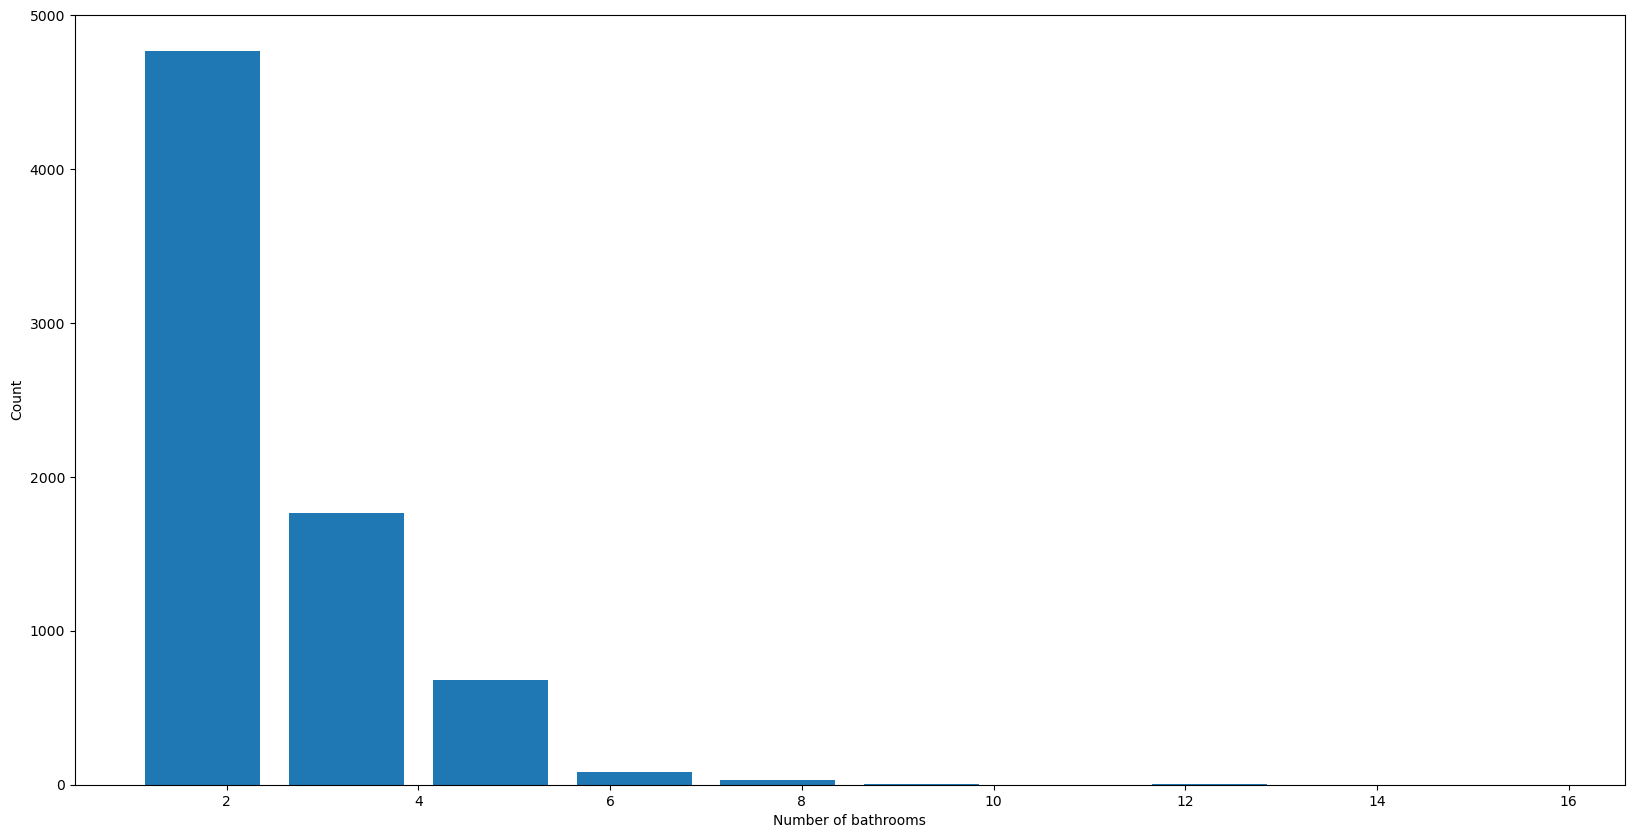

In [124]:
plt.hist(df8.bath,rwidth=0.8)

plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


In [126]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [127]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [128]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Again 

the business manager has a conversation with you (i.e. a data scientist) that 

if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, 

you will have 

total bath = total bed + 1 max. 

Anything above that is an outlier or a data error and can be removed

In [129]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [130]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [131]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


# Use One Hot Encoding For Location


One-hot encoding is a technique used in data preprocessing, particularly in machine learning tasks, to handle categorical 

variables. 

Categorical variables are variables that represent categories or groups, such as colors, types of animals, or cities. 

These variables cannot be directly used in many machine learning algorithms because they require numerical input.

One-hot encoding converts categorical variables into a binary format where each category is represented by a binary vector

Identification of Categorical Variables:

Identify which variables in your dataset are categorical and need to be encoded. 

These variables typically have a finite set of possible values or categories.

Creation of Binary Vectors:

For each categorical variable, a binary vector is created where each category is represented by a binary value (0 or 1). 

The length of the binary vector is equal to the number of unique categories in the variable.

Assigning Binary Values:

In the binary vector, a value of 1 is assigned to the position corresponding to the category, 

and all other positions are assigned a value of 0.

Example:

Consider a categorical variable "Color" with three categories: Red, Green, and Blue. 

After one-hot encoding, the variable would be represented as follows:

Red: [1, 0, 0]

Green: [0, 1, 0]

Blue: [0, 0, 1]

Usage in Machine Learning:

One-hot encoding allows machine learning algorithms to efficiently process categorical data. 

Once the categorical variables are encoded, they can be used as input features in algorithms such as linear regression, decision trees, and neural networks

In [137]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [143]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')


# This line concatenates two DataFrames, 
# df10 and dummies, 
# along the columns axis. 

# The pd.concat() function is used for 
# concatenation in pandas. 

# [df10,dummies.drop('other',axis='columns')] -> FIRST argument

# The second argument passed to concat() is 
# a list containing the DataFrames to be concatenated. 

# dummies.drop('other', axis='columns') 
# drops the 'other' column from the dummies DataFrame 
# before concatenating.

# axis='columns':
# The axis='columns' parameter specifies that 
# the concatenation should be performed along the columns axis. 
# This means that the DataFrames are concatenated side by side.

In [144]:
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [149]:
df12 = df11.drop('location',axis = 'columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [151]:
df12.shape

(7251, 245)


# Build a Model Now...

In [152]:
X = df12.drop(['price'],axis='columns')
X.head(3)

# X contains all the independent variables 

# Dependent variables such as price are dropped from X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
X.shape

(7251, 244)

In [159]:
y = df12.price
y.head()

# Y contains all the dependent variables 

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [160]:
y.shape

(7251,)

In [161]:
len(y)

7251

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# 20% of the data will be used as test data


In [164]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


# Importing LinearRegression:
# from sklearn.linear_model import LinearRegression

# This line imports the LinearRegression class from scikit-learn's linear_model module.
# LinearRegression is a linear regression model implementation provided by scikit-learn.



# Instantiating the Linear Regression Model:
# lr_clf = LinearRegression()

# This line creates an instance of the LinearRegression class, 
# which will be used to fit the linear regression model to the data.



# Fitting the Model to Training Data:
# lr_clf.fit(X_train, y_train)

# This line fits the linear regression model to the training data (X_train, y_train). 

# The fit() method estimates the coefficients of the linear regression model based on 
# the input features X_train and target values y_train.



# Model Evaluation:
# lr_clf.score(X_test, y_test)

# This line calculates the coefficient of determination R^2 
# of the linear regression model on the test data (X_test, y_test). 

# The score() method returns the R^2 score,
# which indicates the proportion of the variance in the target variable 
# that is predictable from the input features. 

# A higher R^2 score closer to 1 indicates a better fit of the model to the test data.

0.8452277697874324

score = 84%

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [166]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)


# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score

# This imports 

# the ShuffleSplit class, which is a cross-validation splitter 
# that shuffles the data before splitting it into train and test sets, 

# and the cross_val_score function, 
# which computes the cross-validated scores for an estimator.



# Defining Cross-Validation Splitter:
# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# This line creates a ShuffleSplit cross-validation splitter object named cv. 

# It specifies the number of splits (n_splits), 
# the proportion of the dataset to include in the test split (test_size) -> 20%, 
# and the random seed (random_state) for reproducibility.



# Performing Cross-Validation:
# cross_val_score(LinearRegression(), X, y, cv=cv)

# This line computes the cross-validated scores for a linear regression model 
# using the cross_val_score function. 

# It takes four main arguments:
    
# LinearRegression(): 
# This specifies the estimator to use, 
# which is a linear regression model.

# X: 
# This represents the input features (independent variables) of the dataset.

# y: 
# This represents the target variable (dependent variable) of the dataset.

# cv: 
# This specifies the cross-validation splitting strategy (ShuffleSplit object).

# The cross_val_score function performs cross-validation by splitting the dataset into 
# train and test sets according to the specified cross-validation strategy (ShuffleSplit), 
# fits the model on the train set, 
# and evaluates it on the test set. 

# It returns an array of scores, 
# where each score corresponds to the evaluation metric
# (e.g., R^2 score) for each cross-validation fold.



array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])


We can see that in 5 iterations we get a score above 80% all the time. 

This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. 

We will use GridSearchCV for this purpose

 # Find best model using GridSearchCV

In [186]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False],
                'fit_intercept': [True, False],
                'n_jobs': [None],  # Specify the number of CPU cores to use for parallelization
                'positive': [False]  # Only applicable when fit_intercept=True
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse','poisson'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\_

,model,best_score,best_params
0,linear_regression,0.819001,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.687431,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.712873,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Based on above results we can say that 

# LinearRegression gives the best score. 

Hence we will use that.

# Test the model for few properties

In [189]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [190]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [191]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [192]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677185246

In [193]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395211893

In [194]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033406

# Export the tested model to a pickle file

In [195]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [196]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))